In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv("C:/Users/prash/Pictures/Group 4_ForestCoverType/covtype.csv")
df.columns=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
                        'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
                        'Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
                        'Horizontal_Distance_To_Fire_Points','Rawah_Wilderness_Area','Neota_Wilderness_Area',
            'Comanche_Peak_Wilderness_Area','Cache_la_Poudre_Wilderness_Area',"Soil_code_2702",
                        "Soil_code_2703","Soil_code_2704","Soil_code_2705","Soil_code_2706","Soil_code_2717",
                        "Soil_code_3501","Soil_code_3502","Soil_code_4201","Soil_code_4703","Soil_code_4704",
                        "Soil_code_4744","Soil_code_4758","Soil_code_5101","Soil_code_5151","Soil_code_6101",
                        "Soil_code_6102","Soil_code_6731","Soil_code_7101","Soil_code_7102","Soil_code_7103",
                        "Soil_code_7201","Soil_code_7202","Soil_code_7700","Soil_code_7701","Soil_code_7702",
                        "Soil_code_7709","Soil_code_7710","Soil_code_7745","Soil_code_7746","Soil_code_7755",
                        "Soil_code_7756","Soil_code_7757","Soil_code_7790","Soil_code_8703","Soil_code_8707",
                        "Soil_code_8708","Soil_code_8771","Soil_code_8772","Soil_code_8776",'Cover_Type']

In [3]:
df['Distance_To_Hydrology']=np.round(np.sqrt(df['Horizontal_Distance_To_Hydrology']**2+
                                             df['Vertical_Distance_To_Hydrology']**2),2)
df['Hillshade']=np.round((df['Hillshade_9am']+df['Hillshade_Noon']+
                                  df['Hillshade_3pm'])/3,2)
df.drop(['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
          'Hillshade_9am','Hillshade_Noon','Hillshade_3pm'], axis=1, inplace=True)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Rawah_Wilderness_Area,Neota_Wilderness_Area,Comanche_Peak_Wilderness_Area,Cache_la_Poudre_Wilderness_Area,Soil_code_2702,Soil_code_2703,Soil_code_2704,Soil_code_2705,Soil_code_2706,Soil_code_2717,Soil_code_3501,Soil_code_3502,Soil_code_4201,Soil_code_4703,Soil_code_4704,Soil_code_4744,Soil_code_4758,Soil_code_5101,Soil_code_5151,Soil_code_6101,Soil_code_6102,Soil_code_6731,Soil_code_7101,Soil_code_7102,Soil_code_7103,Soil_code_7201,Soil_code_7202,Soil_code_7700,Soil_code_7701,Soil_code_7702,Soil_code_7709,Soil_code_7710,Soil_code_7745,Soil_code_7746,Soil_code_7755,Soil_code_7756,Soil_code_7757,Soil_code_7790,Soil_code_8703,Soil_code_8707,Soil_code_8708,Soil_code_8771,Soil_code_8772,Soil_code_8776,Cover_Type,Distance_To_Hydrology,Hillshade
0,2590,56,2,390,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,212.08,202.00
1,2804,139,9,3180,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,275.77,202.33
2,2785,155,18,3090,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,269.24,199.33
3,2595,45,2,391,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,153.00,201.33
4,2579,132,6,67,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,300.37,202.33


## Train Test Split with Statification

In [6]:
from sklearn.model_selection import train_test_split
X=df.drop('Cover_Type',1)
y=df['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,
                                                            stratify=df['Cover_Type'])
# dd=pd.concat([X_working,y_working],axis=1)
pd.concat([df['Cover_Type'].value_counts(normalize=True).mul(100),y_train.value_counts(normalize=True).mul(100)
          ,y_test.value_counts(normalize=True).mul(100)],axis=1, keys=['Population','Train','Test'])

,Population,Train,Test
2,48.760006,48.759918,48.760212
1,36.460583,36.460646,36.460437
3,6.153756,6.153816,6.153617
7,3.530054,3.530060,3.530039
6,2.989100,2.989130,2.989031
5,1.633704,1.633608,1.633927
4,0.472797,0.472822,0.472737


## Balancing Using SMOTE

In [7]:
sm = SMOTE(random_state=42)
X_res, y_res = X_train, y_train 
X_train, y_train = sm.fit_resample(X_res, y_res)
X_train=pd.DataFrame(data=X_train, columns=X.columns)

In [8]:
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)

X_train.shape (1388170, 51)
y_train.shape (1388170,)


## Buliding Random Forest Model with obtained hyperparameters

In [9]:
#Building Base model for Feature importances
rf = RandomForestClassifier(n_jobs=-1,random_state=42)
rf.fit(X_train,y_train)
rfpred=rf.predict(X_test)
trainRF=rf.predict(X_train)
cm= confusion_matrix(y_test,rfpred)
a=pd.DataFrame(data=cm,index=[1,2,3,4,5,6,7], columns=['1','2','3','4','5','6','7'])
a['sum']=a['1']+a['2']+a['3']+a['4']+a['5']+a['6']+a['7']
a['recall']=np.array(np.round(((cm[0][0]/a['sum'][1])*100,(cm[1][1]/a['sum'][2])*100,
                                 (cm[2][2]/a['sum'][3])*100,(cm[3][3]/a['sum'][4])*100,
                                 (cm[4][4]/a['sum'][5])*100,(cm[5][5]/a['sum'][6])*100,
                                 (cm[6][6]/a['sum'][7])*100),2))
print('Train Recall',metrics.recall_score(y_train, trainRF, average='weighted'))
print('Test Recall',metrics.recall_score(y_test,rfpred, average='weighted'))
print(a['recall'])

Train Recall 1.0
Test Recall 0.9588821828529466
1    95.33
2    96.48
3    96.52
4    90.78
5    90.66
6    93.88
7    97.19
Name: recall, dtype: float64


In [10]:
Feature_Scores=pd.DataFrame(data=rf.feature_importances_,index=X_train.columns)
Feature_Scores

,0
Elevation,2.582225e-01
Aspect,6.503875e-02
Slope,3.683247e-02
Horizontal_Distance_To_Roadways,1.271459e-01
Horizontal_Distance_To_Fire_Points,1.082232e-01
Rawah_Wilderness_Area,1.939448e-02
Neota_Wilderness_Area,4.637682e-03
Comanche_Peak_Wilderness_Area,1.854131e-02
Cache_la_Poudre_Wilderness_Area,4.000621e-02
Soil_code_2702,2.254773e-03


In [11]:
#Sellecting the best Columns for Random Forest
Percent =[]
Features=[]
Total_Recall_Train=[]
Total_Recall_Test=[]
Min_Recall_Test=[]
IndRecall=pd.DataFrame(index=[1,2,3,4,5,6,7])
X_train=pd.DataFrame(data=X_train,columns=X.columns)
from sklearn.ensemble import RandomForestClassifier
for i in ['.01','.02','0.03','0.04','0.05']:
    Percent.append(i)
    rf = RandomForestClassifier(n_jobs=-1, random_state=42)
    rf.fit(X_train,y_train)
    feat_imp_RF = rf.feature_importances_
    colsrf = X.columns[feat_imp_RF >= np.float(i)]
    Features.append(len(colsrf))
    rf_imp = RandomForestClassifier(n_jobs=-1, random_state=42)
    rf_imp=rf_imp.fit(X_train[colsrf], y_train)
    rfpred_imp=rf_imp.predict(X_test[colsrf])
    cm= confusion_matrix(y_test,rfpred_imp)
    a=pd.DataFrame(data=cm,index=[1,2,3,4,5,6,7], columns=['1','2','3','4','5','6','7'])
    a['sum']=a['1']+a['2']+a['3']+a['4']+a['5']+a['6']+a['7']
    a['recall']=np.array(np.round(((cm[0][0]/a['sum'][1])*100,(cm[1][1]/a['sum'][2])*100,
                                 (cm[2][2]/a['sum'][3])*100,(cm[3][3]/a['sum'][4])*100,
                                 (cm[4][4]/a['sum'][5])*100,(cm[5][5]/a['sum'][6])*100,
                                 (cm[6][6]/a['sum'][7])*100),2))
    trainRF_imp=rf_imp.predict(X_train[colsrf])
    Total_Recall_Train.append(metrics.recall_score(y_train, trainRF_imp, average='weighted'))
    Total_Recall_Test.append(metrics.recall_score(y_test,rfpred_imp, average='weighted'))
    Min_Recall_Test.append(a['recall'].min())
    IndRecall[i]=a['recall']

In [12]:
summaryRF= pd.DataFrame({'Percent':Percent,'Features':Features,
                      'Total_Recall_Train':Total_Recall_Train,
                         'Total_Recall_Test':Total_Recall_Test,'Min_Recall_Test':Min_Recall_Test})
print(summaryRF)
print(IndRecall)

  Percent  Features  Total_Recall_Train  Total_Recall_Test  Min_Recall_Test
0     .01        15            0.999999           0.953988            90.80
1     .02        10            1.000000           0.952698            90.20
2    0.03         8            1.000000           0.946926            89.47
3    0.04         7            1.000000           0.953013            90.45
4    0.05         5            1.000000           0.955681            90.94
     .01    .02   0.03   0.04   0.05
1  94.71  95.03  94.37  95.05  95.70
2  95.87  95.43  94.92  95.54  95.69
3  96.58  96.40  95.74  96.19  95.43
4  92.23  92.48  91.26  92.48  91.75
5  90.80  90.20  89.47  90.45  90.94
6  94.20  93.99  93.01  93.47  93.28
7  97.50  97.35  97.35  97.25  97.42


# Hyperparameter Tuning

In [15]:
RFtree = RandomForestClassifier(n_jobs=-1,random_state=42,class_weight='balanced',max_depth=25)
RFtree_param = {"criterion":["gini", "entropy"],'n_estimators':[50,100,150]}
RFgrid = RandomizedSearchCV(estimator=RFtree, param_distributions=RFtree_param,
                          cv = 5,random_state=42)
best_parameter_search_RF = RFgrid.fit(X_train[colsrf], y_train)
best_parameter_search_RF.best_params_

{'n_estimators': 150, 'criterion': 'entropy'}

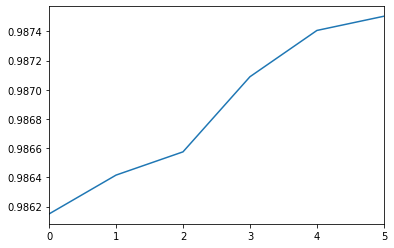

,mean_test_score,param_n_estimators,params
0,0.986150,50,"{'n_estimators': 50, 'criterion': 'gini'}"
1,0.986416,100,"{'n_estimators': 100, 'criterion': 'gini'}"
2,0.986575,150,"{'n_estimators': 150, 'criterion': 'gini'}"
3,0.987089,50,"{'n_estimators': 50, 'criterion': 'entropy'}"
4,0.987406,100,"{'n_estimators': 100, 'criterion': 'entropy'}"
5,0.987504,150,"{'n_estimators': 150, 'criterion': 'entropy'}"


In [16]:
pd.DataFrame(best_parameter_search_RF.cv_results_)['mean_test_score'].plot()
plt.show()
pd.DataFrame(best_parameter_search_RF.cv_results_)[['mean_test_score','param_n_estimators','params']]

### Running the Final Model with Hyperparameters

In [17]:
X_train=pd.DataFrame(data=X_train,columns=X.columns)
rf = RandomForestClassifier(n_jobs=-1,criterion='entropy',n_estimators=50,random_state=42,
                            class_weight='balanced',max_depth=25)
rf.fit(X_train[colsrf],y_train)
rfpred=rf.predict(X_test[colsrf])
trainRF=rf.predict(X_train[colsrf])
cm= confusion_matrix(y_test,rfpred)
print('The required Columns are:',colsrf)
print("The Hyper Parameters are: criterion='entropy',n_estimators=50,random_state=42,class_weight='balanced',max_depth=25")
print('Train Recall',metrics.recall_score(y_train, trainRF, average='weighted'))
print('Test Recall',metrics.recall_score(y_test,rfpred, average='weighted'))

The required Columns are: Index(['Elevation', 'Aspect', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Distance_To_Hydrology'],
      dtype='object')
The Hyper Parameters are: criterion='entropy',n_estimators=50,random_state=42,class_weight='balanced',max_depth=25
Train Recall 0.999851603189811
Test Recall 0.9548145768312832


# Metrics

In [18]:
print("The accuracy of the Train is: ", metrics.accuracy_score(y_train, trainRF))
print("The accuracy of the Test is: ", metrics.accuracy_score(y_test,rfpred))

The accuracy of the Train is:  0.999851603189811
The accuracy of the Test is:  0.9548145768312832


In [19]:
print("The f1_weighted of the Train is: ", metrics.f1_score(y_train, trainRF,average='weighted'))
print("The f1_weighted of the Test is: ", metrics.f1_score(y_test,rfpred,average='weighted'))

The f1_weighted of the Train is:  0.9998515905991566
The f1_weighted of the Test is:  0.9549127139937476


In [20]:
print("The f1_weighted of the Train is: ", metrics.f1_score(y_train, trainRF,average='weighted'))
print("The f1_weighted of the Test is: ", metrics.f1_score(y_test,rfpred,average='weighted'))

The f1_weighted of the Train is:  0.9998515905991566
The f1_weighted of the Test is:  0.9549127139937476


In [21]:
print(metrics.classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96     63552
           2       0.97      0.96      0.96     84991
           3       0.93      0.95      0.94     10726
           4       0.85      0.92      0.88       824
           5       0.85      0.91      0.88      2848
           6       0.90      0.93      0.91      5210
           7       0.95      0.97      0.96      6153

    accuracy                           0.95    174304
   macro avg       0.92      0.94      0.93    174304
weighted avg       0.96      0.95      0.95    174304



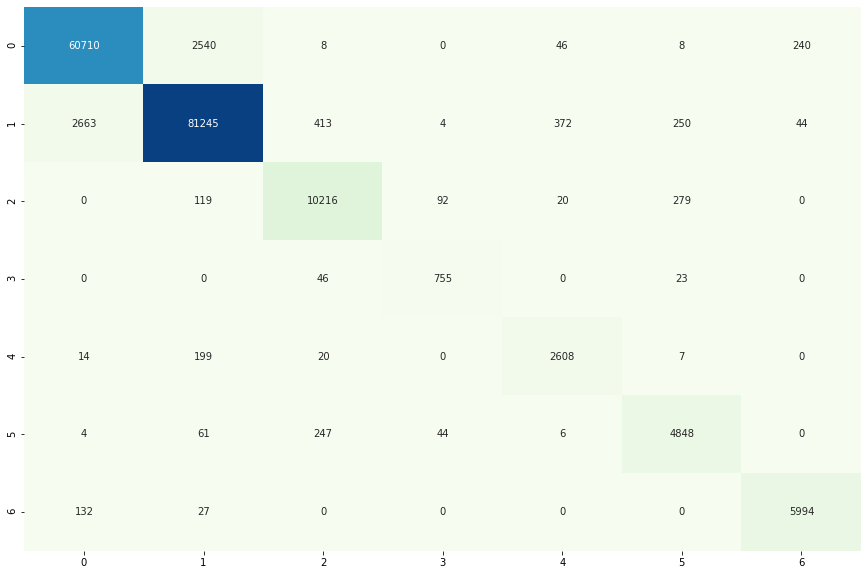

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, fmt='d', cmap='GnBu', cbar=False, annot=True)

In [23]:
misclassified = (y_test!=rfpred).sum()
print('Misclassified samples: {}'.format(misclassified))

Misclassified samples: 7876
